In [50]:
import numpy as np
import pandas as pd
import os

import matplotlib.pyplot as plt
%matplotlib inline

import gensim
import nltk

from selenium import webdriver
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

import seaborn as sns

In [6]:
url="https://towardsdatascience.com/data-science-and-machine-learning-interview-questions-3f6207cf040b"
browser=webdriver.Chrome('chromedriver.exe')
browser.get(url)

In [7]:
para_tags=browser.find_elements_by_css_selector('p')
for para in para_tags:
    print (para.text)

Ah the dreaded machine learning interview. You feel like you know everything… until you’re tested on it! But it doesn’t have to be this way.
Over the past few months I’ve interviewed with many companies for entry-level roles involving Data Science and Machine Learning. To give you a bit of perspective, I was in graduate school in the last few months of my masters in machine learning and computer vision with most of my previous experience being research/academic, but with 8 months at an early stage startup (unrelated to ML). The roles included work in Data Science, general Machine Learning, and specializations in Natural Language Processing or Computer Vision. I interviewed with big companies like Amazon, Tesla, Samsung, Uber, Huawei, but also with many startups ranging from early-stage to well established and funded.
Today I’m going to share with you all of the interview questions I was asked and how to approach them. Many of the questions were quite common and expected theory, but man

In [8]:
text=' '.join([para.text for para in para_tags])
text

'Ah the dreaded machine learning interview. You feel like you know everything… until you’re tested on it! But it doesn’t have to be this way. Over the past few months I’ve interviewed with many companies for entry-level roles involving Data Science and Machine Learning. To give you a bit of perspective, I was in graduate school in the last few months of my masters in machine learning and computer vision with most of my previous experience being research/academic, but with 8 months at an early stage startup (unrelated to ML). The roles included work in Data Science, general Machine Learning, and specializations in Natural Language Processing or Computer Vision. I interviewed with big companies like Amazon, Tesla, Samsung, Uber, Huawei, but also with many startups ranging from early-stage to well established and funded. Today I’m going to share with you all of the interview questions I was asked and how to approach them. Many of the questions were quite common and expected theory, but ma

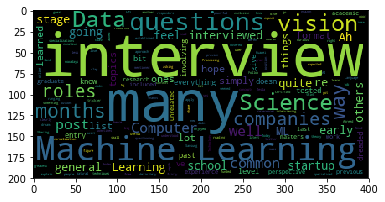

In [9]:
#Bag of words analysis
from wordcloud import WordCloud

wc=WordCloud().generate(text)
plt.imshow(wc)

In [11]:
# question 2: 

In [12]:
amazon=pd.read_csv('sentiment_amazon.csv')
amazon.head()

,review,sentiment
0,So there is no way for me to plug it in here i...,0
1,Great for the jawbone.,1
2,Tied to charger for conversations lasting more...,0
3,The mic is great.,1
4,I have to jiggle the plug to get it to line up...,0


In [13]:
docs=amazon['review'].fillna('').str.lower().str.replace('[^a-z ]', '')
stopwords=nltk.corpus.stopwords.words('english')
stemmer=nltk.stem.PorterStemmer()
def clean_sentence(text):
    return' '.join([stemmer.stem(word) for word in text.split(' ') if word not in stopwords])
docs_clean=docs.apply(clean_sentence)

In [15]:
docs_clean.head()

0                     way plug us unless go convert
1                                      great jawbon
2    tie charger convers last  minutesmajor problem
3                                         mic great
4        jiggl plug get line right get decent volum
Name: review, dtype: object

In [52]:
vectorizer=CountVectorizer(min_df=25)
vectorizer

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=25,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [53]:
vectorizer.fit(docs_clean)

dtm_sparse=vectorizer.transform(docs_clean)
df_dtm=pd.DataFrame(dtm_sparse.toarray(), columns=vectorizer.get_feature_names())
df_dtm.head()

,batteri,ear,good,great,headset,one,phone,product,qualiti,sound,use,work
0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0


In [54]:
cs_matrix=cosine_similarity(df_dtm.T)
cs_matrix

array([[1.        , 0.        , 0.04796011, 0.05980892, 0.02632491,
        0.        , 0.08489527, 0.        , 0.        , 0.        ,
        0.07271792, 0.05446449],
       [0.        , 1.        , 0.02250746, 0.01871203, 0.09883324,
        0.11461365, 0.02656064, 0.07142857, 0.        , 0.14580296,
        0.04550158, 0.01703995],
       [0.04796011, 0.02250746, 1.        , 0.        , 0.02335709,
        0.        , 0.05021624, 0.06752237, 0.20958501, 0.05513178,
        0.        , 0.06443237],
       [0.05980892, 0.01871203, 0.        , 1.        , 0.01941839,
        0.02251887, 0.16699314, 0.11227218, 0.02178034, 0.06875239,
        0.03575993, 0.26783579],
       [0.02632491, 0.09883324, 0.02335709, 0.01941839, 1.        ,
        0.02973505, 0.01378164, 0.        , 0.0862796 , 0.12104551,
        0.14165765, 0.05304959],
       [0.        , 0.11461365, 0.        , 0.02251887, 0.02973505,
        1.        , 0.07991055, 0.02865341, 0.06670373, 0.03509312,
        0.05475857,

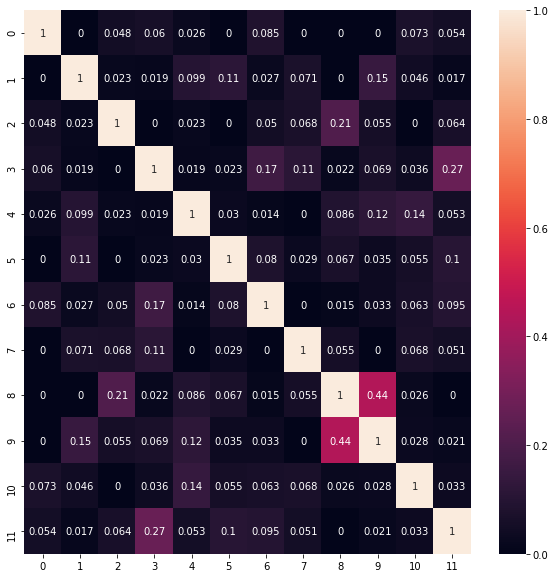

In [56]:
plt.figure(figsize=(10,10))
sns.heatmap(cs_matrix, annot=True)

In [60]:
cs_matrix.max()

1.0000000000000002